<a href="https://colab.research.google.com/github/fralfaro/r4ds-book/blob/main/docs/05_data_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data transformation

## Introduction

Visualisation is an important tool for insight generation, but it is rare that you get the data in exactly the right form you need.
Often you'll need to create some new variables or summaries, or maybe you just want to rename the variables or reorder the observations in order to make the data a little easier to work with.
You'll learn how to do all that (and more!) in this chapter, which will teach you how to transform your data using the dplyr package and a new dataset on flights departing New York City in 2013.

### Prerequisites

In this chapter we're going to focus on how to use the dplyr package, another core member of the tidyverse.
We'll illustrate the key ideas using data from the nycflights13 package, and use ggplot2 to help us understand the data.



In [5]:
install.packages("nycflights13")
library(nycflights13)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Take careful note of the conflicts message that's printed when you load the tidyverse.
It tells you that dplyr overwrites some functions in base R.
If you want to use the base version of these functions after loading dplyr, you'll need to use their full names: `stats::filter()` and `stats::lag()`.

### nycflights13

To explore the basic data manipulation verbs of dplyr, we'll use `nycflights13::flights`.
This data frame contains all `r format(nrow(nycflights13::flights), big.mark = ",")` flights that departed from New York City in 2013.
The data comes from the US [Bureau of Transportation Statistics](http://www.transtats.bts.gov/DatabaseInfo.asp?DB_ID=120&Link=0), and is documented in `?flights`.



In [6]:
flights

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00



You might notice that this data frame prints a little differently from other data frames you might have used in the past: it only shows the first few rows and all the columns that fit on one screen.
It also displays the number of rows (`r format(nrow(nycflights13::flights), big.mark = ",")`) and columns (`r ncol(nycflights13::flights)`).
(To see the whole dataset, you can run `View(flights)` which will open the dataset in the RStudio viewer).
It prints differently because it's a **tibble**.
Tibbles are data frames, but slightly tweaked to work better in the tidyverse.
For now, you don’t need to worry about the differences; we’ll come back to tibbles in more detail in [wrangle](../09_introduction).

You might also have noticed the row of three (or four) letter abbreviations under the column names.
These describe the type of each variable:

-   `int` stands for integers.

-   `dbl` stands for doubles, or real numbers.

-   `chr` stands for characters, or strings.

-   `dttm` stands for date-times (a date + a time).

There are three other common types of variables that aren't used in this dataset but you'll encounter later in the book:

-   `lgl` stands for logical, vectors that contain only `TRUE` or `FALSE`.

-   `fctr` stands for factors, which R uses to represent categorical variables with fixed possible values.

-   `date` stands for dates.

### dplyr basics

In this chapter you are going to learn the five key dplyr functions that allow you to solve the vast majority of your data manipulation challenges:

-   Pick observations by their values (`filter()`).
-   Reorder the rows (`arrange()`).
-   Pick variables by their names (`select()`).
-   Create new variables with functions of existing variables (`mutate()`).
-   Collapse many values down to a single summary (`summarise()`).

These can all be used in conjunction with `group_by()` which changes the scope of each function from operating on the entire dataset to operating on it group-by-group.
These six functions provide the verbs for a language of data manipulation.

All verbs work similarly:

1.  The first argument is a data frame.

2.  The subsequent arguments describe what to do with the data frame, using the variable names (without quotes).

3.  The result is a new data frame.

Together these properties make it easy to chain together multiple simple steps to achieve a complex result.
Let's dive in and see how these verbs work.

## Filter rows with `filter()`

`filter()` allows you to subset observations based on their values.
The first argument is the name of the data frame.
The second and subsequent arguments are the expressions that filter the data frame.
For example, we can select all flights on January 1st with:


In [7]:
filter(flights, month == 1, day == 1)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00



When you run that line of code, dplyr executes the filtering operation and returns a new data frame.
dplyr functions never modify their inputs, so if you want to save the result, you'll need to use the assignment operator, `<-`:


In [8]:
jan1 <- filter(flights, month == 1, day == 1)


R either prints out the results, or saves them to a variable.
If you want to do both, you can wrap the assignment in parentheses:



In [9]:
(dec25 <- filter(flights, month == 12, day == 25))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,12,25,456,500,-4,649,651,-2,US,1895,N156UW,EWR,CLT,98,529,5,0,2013-12-25 05:00:00
2013,12,25,524,515,9,805,814,-9,UA,1016,N32404,EWR,IAH,203,1400,5,15,2013-12-25 05:00:00
2013,12,25,542,540,2,832,850,-18,AA,2243,N5EBAA,JFK,MIA,146,1089,5,40,2013-12-25 05:00:00
2013,12,25,546,550,-4,1022,1027,-5,B6,939,N665JB,JFK,BQN,191,1576,5,50,2013-12-25 05:00:00
2013,12,25,556,600,-4,730,745,-15,AA,301,N3JLAA,LGA,ORD,123,733,6,0,2013-12-25 06:00:00
2013,12,25,557,600,-3,743,752,-9,DL,731,N369NB,LGA,DTW,88,502,6,0,2013-12-25 06:00:00
2013,12,25,557,600,-3,818,831,-13,DL,904,N397DA,LGA,ATL,118,762,6,0,2013-12-25 06:00:00
2013,12,25,559,600,-1,855,856,-1,B6,371,N608JB,LGA,FLL,147,1076,6,0,2013-12-25 06:00:00
2013,12,25,559,600,-1,849,855,-6,B6,605,N536JB,EWR,FLL,149,1065,6,0,2013-12-25 06:00:00



### Comparisons

To use filtering effectively, you have to know how to select the observations that you want using the comparison operators.
R provides the standard suite: `>`, `>=`, `<`, `<=`, `!=` (not equal), and `==` (equal).

When you're starting out with R, the easiest mistake to make is to use `=` instead of `==` when testing for equality.
When this happens you'll get an informative error:



In [10]:
filter(flights, month = 1)

ERROR: ignored


There's another common problem you might encounter when using `==`: floating point numbers.
These results might surprise you!



In [11]:
(sqrt(2) ^ 2) == 2

[1] FALSE

In [12]:
(1 / 49 * 49) == 1

[1] FALSE


Computers use finite precision arithmetic (they obviously can't store an infinite number of digits!) so remember that every number you see is an approximation.
Instead of relying on `==`, use `near()`:



In [13]:
near(sqrt(2) ^ 2,  2)

[1] TRUE

In [14]:
near(1 / 49 * 49, 1)

[1] TRUE


### Logical operators

Multiple arguments to `filter()` are combined with "and": every expression must be true in order for a row to be included in the output.
For other types of combinations, you'll need to use Boolean operators yourself: `&` is "and", `|` is "or", and `!` is "not".
The following figure shows the complete set of Boolean operations.

<center>
    <img src="https://d33wubrfki0l68.cloudfront.net/01f4b6d39d2be8269740a3ad7946faa79f7243cf/8369a/diagrams/transform-logical.png" alt="img R" >

Complete set of boolean operations. `x` is the left-hand circle, `y` is the right-hand circle, and the shaded region show which parts each operator selects.
</center>



The following code finds all flights that departed in November or December:




```r
filter(flights, month == 11 | month == 12)
```



The order of operations doesn't work like English.
You can't write `filter(flights, month == (11 | 12))`, which you might literally translate into "finds all flights that departed in November or December".
Instead it finds all months that equal `11 | 12`, an expression that evaluates to `TRUE`.
In a numeric context (like here), `TRUE` becomes `1`, so this finds all flights in January, not November or December.
This is quite confusing!

A useful short-hand for this problem is `x %in% y`.
This will select every row where `x` is one of the values in `y`.
We could use it to rewrite the code above:



```r
nov_dec <- filter(flights, month %in% c(11, 12))
```



Sometimes you can simplify complicated subsetting by remembering De Morgan's law: `!(x & y)` is the same as `!x | !y`, and `!(x | y)` is the same as `!x & !y`.
For example, if you wanted to find flights that weren't delayed (on arrival or departure) by more than two hours, you could use either of the following two filters:




```r
filter(flights, !(arr_delay > 120 | dep_delay > 120))
filter(flights, arr_delay <= 120, dep_delay <= 120)
```



As well as `&` and `|`, R also has `&&` and `||`.
Don't use them here!
You'll learn when you should use them in Section [functions](../19_functions) (conditional execution).

Whenever you start using complicated, multipart expressions in `filter()`, consider making them explicit variables instead.
That makes it much easier to check your work.
You'll learn how to create new variables shortly.

### Missing values 

One important feature of R that can make comparison tricky is missing values, or `NA`s ("not availables").
`NA` represents an unknown value so missing values are "contagious": almost any operation involving an unknown value will also be unknown.


In [15]:
NA > 5

[1] NA

In [16]:
10 == NA

[1] NA

In [17]:
NA + 10

[1] NA

In [18]:
NA / 2

[1] NA


The most confusing result is this one:


In [19]:
NA == NA

[1] NA


It's easiest to understand why this is true with a bit more context:


In [20]:
# Let x be Mary's age. We don't know how old she is.
x <- NA

# Let y be John's age. We don't know how old he is.
y <- NA

# Are John and Mary the same age?
x == y
# We don't know!

[1] NA


If you want to determine if a value is missing, use `is.na()`:


In [21]:
is.na(x)

[1] TRUE


`filter()` only includes rows where the condition is `TRUE`; it excludes both `FALSE` and `NA` values.
If you want to preserve missing values, ask for them explicitly:


In [22]:
df <- tibble(x = c(1, NA, 3))
filter(df, x > 1)

x
<dbl>
3


In [23]:
filter(df, is.na(x) | x > 1)

x
<dbl>
NA
3



### Exercises

1.  Find all flights that

    a.  Had an arrival delay of two or more hours
    b.  Flew to Houston (`IAH` or `HOU`)
    c.  Were operated by United, American, or Delta
    d.  Departed in summer (July, August, and September)
    e.  Arrived more than two hours late, but didn't leave late
    f.  Were delayed by at least an hour, but made up over 30 minutes in flight
    g.  Departed between midnight and 6am (inclusive)

2.  Another useful dplyr filtering helper is `between()`.
    What does it do?
    Can you use it to simplify the code needed to answer the previous challenges?

3.  How many flights have a missing `dep_time`?
    What other variables are missing?
    What might these rows represent?

4.  Why is `NA ^ 0` not missing?
    Why is `NA | TRUE` not missing?
    Why is `FALSE & NA` not missing?
    Can you figure out the general rule?
    (`NA * 0` is a tricky counterexample!)

## Arrange rows with `arrange()`

`arrange()` works similarly to `filter()` except that instead of selecting rows, it changes their order.
It takes a data frame and a set of column names (or more complicated expressions) to order by.
If you provide more than one column name, each additional column will be used to break ties in the values of preceding columns:


In [24]:
arrange(flights, year, month, day)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00



Use `desc()` to re-order by a column in descending order:


In [25]:
arrange(flights, desc(dep_delay))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00
2013,3,17,2321,810,911,135,1020,915,DL,2119,N927DA,LGA,MSP,167,1020,8,10,2013-03-17 08:00:00
2013,6,27,959,1900,899,1236,2226,850,DL,2007,N3762Y,JFK,PDX,313,2454,19,0,2013-06-27 19:00:00
2013,7,22,2257,759,898,121,1026,895,DL,2047,N6716C,LGA,ATL,109,762,7,59,2013-07-22 07:00:00



Missing values are always sorted at the end:



In [26]:
df <- tibble(x = c(5, 2, NA))
arrange(df, x)

x
<dbl>
2
5
NA


In [27]:
arrange(df, desc(x))

x
<dbl>
5
2
NA



### Exercises

1.  Sort `flights` to find the flights with longest departure delays.
    Find the flights that left earliest.

2.  Sort `flights` to find the fastest (highest speed) flights.

3.  Which flights travelled the farthest?
    Which travelled the shortest?

4.  How could you use `arrange()` to sort all missing values to the start?
    (Hint: use `!is.na()`).

## Select columns with `select()` 

It's not uncommon to get datasets with hundreds or even thousands of variables.
In this case, the first challenge is often narrowing in on the variables you're actually interested in.
`select()` allows you to rapidly zoom in on a useful subset using operations based on the names of the variables.

`select()` is not terribly useful with the flights data because we only have 19 variables, but you can still get the general idea:


In [28]:
# Select columns by name
select(flights, year, month, day)

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [29]:
# Select all columns between year and day (inclusive)
select(flights, year:day)

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [30]:
# Select all columns except those from year to day (inclusive)
select(flights, -(year:day))

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00



There are a number of helper functions you can use within `select()`:

-   `starts_with("abc")`: matches names that begin with "abc".

-   `ends_with("xyz")`: matches names that end with "xyz".

-   `contains("ijk")`: matches names that contain "ijk".

-   `matches("(.)\\1")`: selects variables that match a regular expression. This one matches any variables that contain repeated characters. You'll learn more about regular expressions in [strings].

-   `num_range("x", 1:3)`: matches `x1`, `x2` and `x3`.

See `?select` for more details.

`select()` can be used to rename variables, but it's rarely useful because it drops all of the variables not explicitly mentioned.
Instead, use `rename()`, which is a variant of `select()` that keeps all the variables that aren't explicitly mentioned:



In [31]:
rename(flights, tail_num = tailnum)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00



If you want to move certain variables to the start of the data frame but not drop the others, you can do this in two ways: using `select()` in conjunction with the `everything()` helper or using `relocate()`.


In [32]:
select(flights, time_hour, air_time, everything())

time_hour,air_time,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,hour,minute
<dttm>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013-01-01 05:00:00,227,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,1400,5,15
2013-01-01 05:00:00,227,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,1416,5,29
2013-01-01 05:00:00,160,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,1089,5,40
2013-01-01 05:00:00,183,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,1576,5,45
2013-01-01 06:00:00,116,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,762,6,0
2013-01-01 05:00:00,150,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,719,5,58
2013-01-01 06:00:00,158,2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,1065,6,0
2013-01-01 06:00:00,53,2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,229,6,0
2013-01-01 06:00:00,140,2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,944,6,0



### Exercises

1.  Brainstorm as many ways as possible to select `dep_time`, `dep_delay`, `arr_time`, and `arr_delay` from `flights`.

2.  What happens if you include the name of a variable multiple times in a `select()` call?

3.  What does the `any_of()` function do?
    Why might it be helpful in conjunction with this vector?
    
    ```r
    variables <- c("year", "month", "day", "dep_delay", "arr_delay")
    ```


4.  Does the result of running the following code surprise you?
    How do the select helpers deal with case by default?
    How can you change that default?

    ```r
    select(flights, contains("TIME"))
    ```


## Add new variables with `mutate()`

Besides selecting sets of existing columns, it's often useful to add new columns that are functions of existing columns.
That's the job of `mutate()`.

`mutate()` always adds new columns at the end of your dataset so we'll start by creating a narrower dataset so we can see the new variables.
Remember that when you're in RStudio, the easiest way to see all the columns is `View()`.


In [33]:
flights_sml <- select(flights, 
  year:day, 
  ends_with("delay"), 
  distance, 
  air_time
)

In [34]:
mutate(flights_sml,
  gain = dep_delay - arr_delay,
  speed = distance / air_time * 60
)

year,month,day,dep_delay,arr_delay,distance,air_time,gain,speed
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227,-9,370.0441
2013,1,1,4,20,1416,227,-16,374.2731
2013,1,1,2,33,1089,160,-31,408.3750
2013,1,1,-1,-18,1576,183,17,516.7213
2013,1,1,-6,-25,762,116,19,394.1379
2013,1,1,-4,12,719,150,-16,287.6000
2013,1,1,-5,19,1065,158,-24,404.4304
2013,1,1,-3,-14,229,53,11,259.2453
2013,1,1,-3,-8,944,140,5,404.5714



Note that you can refer to columns that you've just created:


In [35]:
mutate(flights_sml,
  gain = dep_delay - arr_delay,
  hours = air_time / 60,
  gain_per_hour = gain / hours
)

year,month,day,dep_delay,arr_delay,distance,air_time,gain,hours,gain_per_hour
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227,-9,3.7833333,-2.3788546
2013,1,1,4,20,1416,227,-16,3.7833333,-4.2290749
2013,1,1,2,33,1089,160,-31,2.6666667,-11.6250000
2013,1,1,-1,-18,1576,183,17,3.0500000,5.5737705
2013,1,1,-6,-25,762,116,19,1.9333333,9.8275862
2013,1,1,-4,12,719,150,-16,2.5000000,-6.4000000
2013,1,1,-5,19,1065,158,-24,2.6333333,-9.1139241
2013,1,1,-3,-14,229,53,11,0.8833333,12.4528302
2013,1,1,-3,-8,944,140,5,2.3333333,2.1428571



If you only want to keep the new variables, use `transmute()`:


In [36]:
transmute(flights,
  gain = dep_delay - arr_delay,
  hours = air_time / 60,
  gain_per_hour = gain / hours
)

gain,hours,gain_per_hour
<dbl>,<dbl>,<dbl>
-9,3.7833333,-2.3788546
-16,3.7833333,-4.2290749
-31,2.6666667,-11.6250000
17,3.0500000,5.5737705
19,1.9333333,9.8275862
-16,2.5000000,-6.4000000
-24,2.6333333,-9.1139241
11,0.8833333,12.4528302
5,2.3333333,2.1428571



### Useful creation functions 

There are many functions for creating new variables that you can use with `mutate()`.
The key property is that the function must be vectorised: it must take a vector of values as input, return a vector with the same number of values as output.
There's no way to list every possible function that you might use, but here's a selection of functions that are frequently useful:

-   Arithmetic operators: `+`, `-`, `*`, `/`, `^`.
    These are all vectorised, using the so called "recycling rules".
    If one parameter is shorter than the other, it will be automatically extended to be the same length.
    This is most useful when one of the arguments is a single number: `air_time / 60`, `hours * 60 + minute`, etc.

    Arithmetic operators are also useful in conjunction with the aggregate functions you'll learn about later.
    For example, `x / sum(x)` calculates the proportion of a total, and `y - mean(y)` computes the difference from the mean.

-   Modular arithmetic: `%/%` (integer division) and `%%` (remainder), where `x == y * (x %/% y) + (x %% y)`.
    Modular arithmetic is a handy tool because it allows you to break integers up into pieces.
    For example, in the flights dataset, you can compute `hour` and `minute` from `dep_time` with:


In [37]:
transmute(flights,
  dep_time,
  hour = dep_time %/% 100,
  minute = dep_time %% 100
)

dep_time,hour,minute
<int>,<dbl>,<dbl>
517,5,17
533,5,33
542,5,42
544,5,44
554,5,54
554,5,54
555,5,55
557,5,57
557,5,57



-   Logs: `log()`, `log2()`, `log10()`.
    Logarithms are an incredibly useful transformation for dealing with data that ranges across multiple orders of magnitude.
    They also convert multiplicative relationships to additive.

    All else being equal, I recommend using `log2()` because it's easy to interpret: a difference of 1 on the log scale corresponds to doubling on the original scale and a difference of -1 corresponds to halving.

-   Offsets: `lead()` and `lag()` allow you to refer to leading or lagging values.
    This allows you to compute running differences (e.g. `x - lag(x)`) or find when values change (`x != lag(x)`).
    They are most useful in conjunction with `group_by()`, which you'll learn about shortly.


In [38]:
(x <- 1:10)

[1]  1  2  3  4  5  6  7  8  9 10

In [39]:
lag(x)

[1] NA  1  2  3  4  5  6  7  8  9

In [40]:
lead(x)

[1]  2  3  4  5  6  7  8  9 10 NA


-   Cumulative and rolling aggregates: R provides functions for running sums, products, mins and maxes: `cumsum()`, `cumprod()`, `cummin()`, `cummax()`; and dplyr provides `cummean()` for cumulative means.
    If you need rolling aggregates (i.e. a sum computed over a rolling window), try the RcppRoll package.


In [41]:
x

[1]  1  2  3  4  5  6  7  8  9 10

In [42]:
cumsum(x)

[1]  1  3  6 10 15 21 28 36 45 55

In [43]:
cummean(x)

[1] 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5


-   Logical comparisons: `<`, `<=`, `>`, `>=`, `!=`, and `==`, which you learned about earlier.
    If you're doing a complex sequence of logical operations it's often a good idea to store the interim values in new variables so you can check that each step is working as expected.

-   Ranking: there are a number of ranking functions, but you should start with `min_rank()`.
    It does the most usual type of ranking (e.g. 1st, 2nd, 2nd, 4th).
    The default gives smallest values the small ranks; use `desc(x)` to give the largest values the smallest ranks.


In [44]:
y <- c(1, 2, 2, NA, 3, 4)

In [45]:
min_rank(y)

[1]  1  2  2 NA  4  5

In [46]:
min_rank(desc(y))

[1]  5  3  3 NA  2  1


   If `min_rank()` doesn't do what you need, look at the variants `row_number()`, `dense_rank()`, `percent_rank()`, `cume_dist()`, `ntile()`.
    See their help pages for more details.


In [47]:
row_number(y)

[1]  1  2  3 NA  4  5

In [48]:
dense_rank(y)

[1]  1  2  2 NA  3  4

In [49]:
percent_rank(y)

[1] 0.00 0.25 0.25   NA 0.75 1.00

In [50]:
cume_dist(y)

[1] 0.2 0.6 0.6  NA 0.8 1.0


### Exercises



1.  Currently `dep_time` and `sched_dep_time` are convenient to look at, but hard to compute with because they're not really continuous numbers.
    Convert them to a more convenient representation of number of minutes since midnight.

2.  Compare `air_time` with `arr_time - dep_time`.
    What do you expect to see?
    What do you see?
    What do you need to do to fix it?

3.  Compare `dep_time`, `sched_dep_time`, and `dep_delay`.
    How would you expect those three numbers to be related?

4.  Find the 10 most delayed flights using a ranking function.
    How do you want to handle ties?
    Carefully read the documentation for `min_rank()`.

5.  What does `1:3 + 1:10` return?
    Why?

6.  What trigonometric functions does R provide?

## Grouped summaries with `summarise()`

The last key verb is `summarise()`.
It collapses a data frame to a single row:


In [51]:
summarise(flights, delay = mean(dep_delay, na.rm = TRUE))

delay
<dbl>
12.63907



(We'll come back to what that `na.rm = TRUE` means very shortly.)

`summarise()` is not terribly useful unless we pair it with `group_by()`.
This changes the unit of analysis from the complete dataset to individual groups.
Then, when you use the dplyr verbs on a grouped data frame they'll be automatically applied "by group".
For example, if we applied exactly the same code to a data frame grouped by month, we get the average delay per month:


In [52]:
by_month <- group_by(flights, month)
summarise(by_month, delay = mean(dep_delay, na.rm = TRUE))

month,delay
<int>,<dbl>
1,10.036665
2,10.816843
3,13.227076
4,13.938038
5,12.986859
6,20.846332
7,21.727787
8,12.611040
9,6.722476



Together `group_by()` and `summarise()` provide one of the tools that you'll use most commonly when working with dplyr: grouped summaries.
But before we go any further with this, we need to introduce a powerful new idea: the pipe.

### Combining multiple operations with the pipe

Imagine that we want to explore the relationship between the distance and average delay for each location.
Using what you know about dplyr, you might write code like this:



`geom_smooth()` using method = 'loess' and formula 'y ~ x'



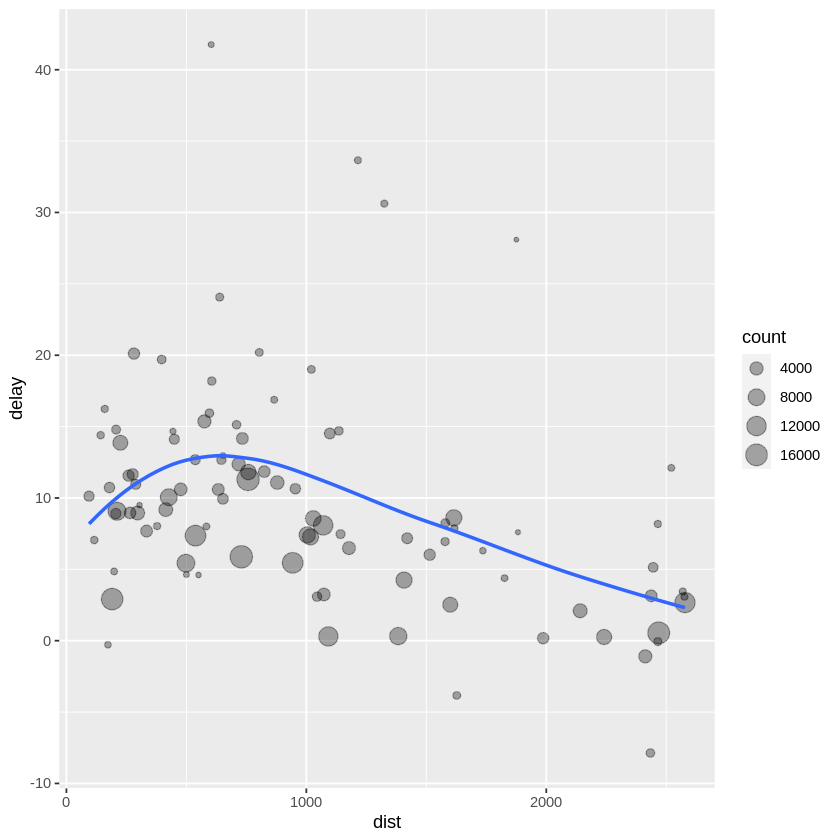

In [53]:
by_dest <- group_by(flights, dest)
delay <- summarise(by_dest,
  count = n(),
  dist = mean(distance, na.rm = TRUE),
  delay = mean(arr_delay, na.rm = TRUE)
)
delay <- filter(delay, count > 20, dest != "HNL")

# It looks like delays increase with distance up to ~750 miles 
# and then decrease. Maybe as flights get longer there's more 
# ability to make up delays in the air?
ggplot(data = delay, mapping = aes(x = dist, y = delay)) +
  geom_point(aes(size = count), alpha = 1/3) +
  geom_smooth(se = FALSE)



There are three steps to prepare this data:

1.  Group flights by destination.

2.  Summarise to compute distance, average delay, and number of flights.

3.  Filter to remove noisy points and Honolulu airport, which is almost twice as far away as the next closest airport.

This code is a little frustrating to write because we have to give each intermediate data frame a name, even though we don't care about them.
Naming things is hard, so this slows down our analysis.

There's another way to tackle the same problem with the pipe, `%>%`:


In [54]:
sdelays <- flights %>% 
  group_by(dest) %>% 
  summarise(
    count = n(),
    dist = mean(distance, na.rm = TRUE),
    delay = mean(arr_delay, na.rm = TRUE)
  ) %>% 
  filter(count > 20, dest != "HNL")


This focuses on the transformations, not what's being transformed, which makes the code easier to read.
You can read it as a series of imperative statements: group, then summarise, then filter.
As suggested by this reading, a good way to pronounce `%>%` when reading code is "then".

Behind the scenes, `x %>% f(y)` turns into `f(x, y)`, and `x %>% f(y) %>% g(z)` turns into `g(f(x, y), z)` and so on.
You can use the pipe to rewrite multiple operations in a way that you can read left-to-right, top-to-bottom.
We'll use piping frequently from now on because it considerably improves the readability of code, and we'll come back to it in more detail in Chapter [pipes](../18_pipes).

Working with the pipe is one of the key criteria for belonging to the tidyverse.
The only exception is ggplot2: it was written before the pipe was discovered.
Unfortunately, the next iteration of ggplot2, ggvis, which does use the pipe, isn't quite ready for prime time yet.

### Missing values 

You may have wondered about the `na.rm` argument we used above.
What happens if we don't set it?


In [55]:
flights %>% 
  group_by(month) %>% 
  summarise(mean = mean(dep_delay))

month,mean
<int>,<dbl>
1,NA
2,NA
3,NA
4,NA
5,NA
6,NA
7,NA
8,NA
9,NA



We get a lot of missing values!
That's because aggregation functions obey the usual rule of missing values: if there's any missing value in the input, the output will be a missing value.
Fortunately, all aggregation functions have an `na.rm` argument which removes the missing values prior to computation:


In [56]:
flights %>% 
  group_by(month) %>% 
  summarise(mean = mean(dep_delay, na.rm = TRUE))

month,mean
<int>,<dbl>
1,10.036665
2,10.816843
3,13.227076
4,13.938038
5,12.986859
6,20.846332
7,21.727787
8,12.611040
9,6.722476



In this case, missing values represent cancelled flights, therefore we could also tackle the problem by first removing the cancelled flights.
We'll save this dataset so we can reuse it in the next few examples.



In [57]:
not_cancelled <- flights %>% 
  filter(!is.na(dep_delay), !is.na(arr_delay))


In [58]:
not_cancelled %>% 
  group_by(month) %>% 
  summarise(mean = mean(dep_delay))

month,mean
<int>,<dbl>
1,9.985491
2,10.760239
3,13.164289
4,13.849187
5,12.891709
6,20.725614
7,21.522179
8,12.570524
9,6.630285



### Grouping by multiple variables

You can group a data frame by multiple variables as well.
Note that the grouping information is printed on top of the output.
The number in the square brackets indicates how many groups are created.



In [59]:
daily <- group_by(flights, year, month, day)
daily

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00



When you group by multiple variables, each summary peels off one level of the grouping by default, and a message is printed that tells you how you can change this behaviour.


In [60]:
summarise(daily, flights = n())

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,flights
<int>,<int>,<int>,<int>
2013,1,1,842
2013,1,2,943
2013,1,3,914
2013,1,4,915
2013,1,5,720
2013,1,6,832
2013,1,7,933
2013,1,8,899
2013,1,9,902



If you're happy with this behaviour, you can also explicitly define it, in which case the message won't be printed out.


In [61]:
summarise(daily, flights = n(), .groups = "drop_last")

year,month,day,flights
<int>,<int>,<int>,<int>
2013,1,1,842
2013,1,2,943
2013,1,3,914
2013,1,4,915
2013,1,5,720
2013,1,6,832
2013,1,7,933
2013,1,8,899
2013,1,9,902



Or you can change the default behaviour by setting a different value, e.g. `"drop"` for dropping all levels of grouping or `"keep"` for same grouping structure as `daily`.



In [63]:
# Note the difference between the grouping structures
summarise(daily, flights = n(), .groups = "drop")

year,month,day,flights
<int>,<int>,<int>,<int>
2013,1,1,842
2013,1,2,943
2013,1,3,914
2013,1,4,915
2013,1,5,720
2013,1,6,832
2013,1,7,933
2013,1,8,899
2013,1,9,902


In [64]:

summarise(daily, flights = n(), .groups = "keep")

year,month,day,flights
<int>,<int>,<int>,<int>
2013,1,1,842
2013,1,2,943
2013,1,3,914
2013,1,4,915
2013,1,5,720
2013,1,6,832
2013,1,7,933
2013,1,8,899
2013,1,9,902



The fact that each summary peels off one level of the grouping by default makes it easy to progressively roll up a dataset:


In [68]:
(per_day   <- summarise(daily, flights = n()))
(per_month <- summarise(per_day, flights = sum(flights)))
(per_year  <- summarise(per_month, flights = sum(flights)))

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,flights
<int>,<int>,<int>,<int>
2013,1,1,842
2013,1,2,943
2013,1,3,914
2013,1,4,915
2013,1,5,720
2013,1,6,832
2013,1,7,933
2013,1,8,899
2013,1,9,902


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,month,flights
<int>,<int>,<int>
2013,1,27004
2013,2,24951
2013,3,28834
2013,4,28330
2013,5,28796
2013,6,28243
2013,7,29425
2013,8,29327
2013,9,27574


year,flights
<int>,<int>
2013,336776



Be careful when progressively rolling up summaries: it's OK for sums and counts, but you need to think about weighting means and variances, and it's not possible to do it exactly for rank-based statistics like the median.
In other words, the sum of groupwise sums is the overall sum, but the median of groupwise medians is not the overall median.

### Ungrouping

You might also want to remove grouping outside of `summarise()`.
You can do this and return to operations on ungrouped data using `ungroup()`.


In [69]:
daily %>% 
  ungroup() %>%             # no longer grouped by date
  summarise(flights = n())  # all flights

flights
<int>
336776



### Counts

Whenever you do any aggregation, it's always a good idea to include either a count (`n()`), or a count of non-missing values (`sum(!is.na(x))`).
That way you can check that you're not drawing conclusions based on very small amounts of data.
For example, let's look at the planes (identified by their tail number) that have the highest average delays:


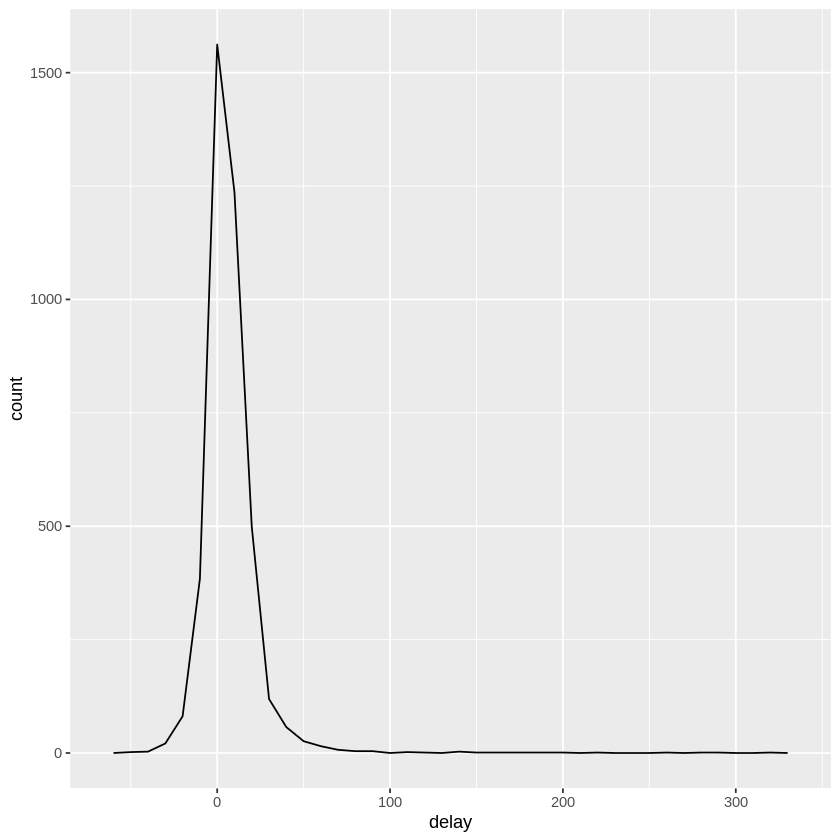

In [70]:
delays <- not_cancelled %>% 
  group_by(tailnum) %>% 
  summarise(
    delay = mean(arr_delay)
  )

ggplot(data = delays, mapping = aes(x = delay)) + 
  geom_freqpoly(binwidth = 10)


Wow, there are some planes that have an *average* delay of 5 hours (300 minutes)!

The story is actually a little more nuanced.
We can get more insight if we draw a scatterplot of number of flights vs. average delay:


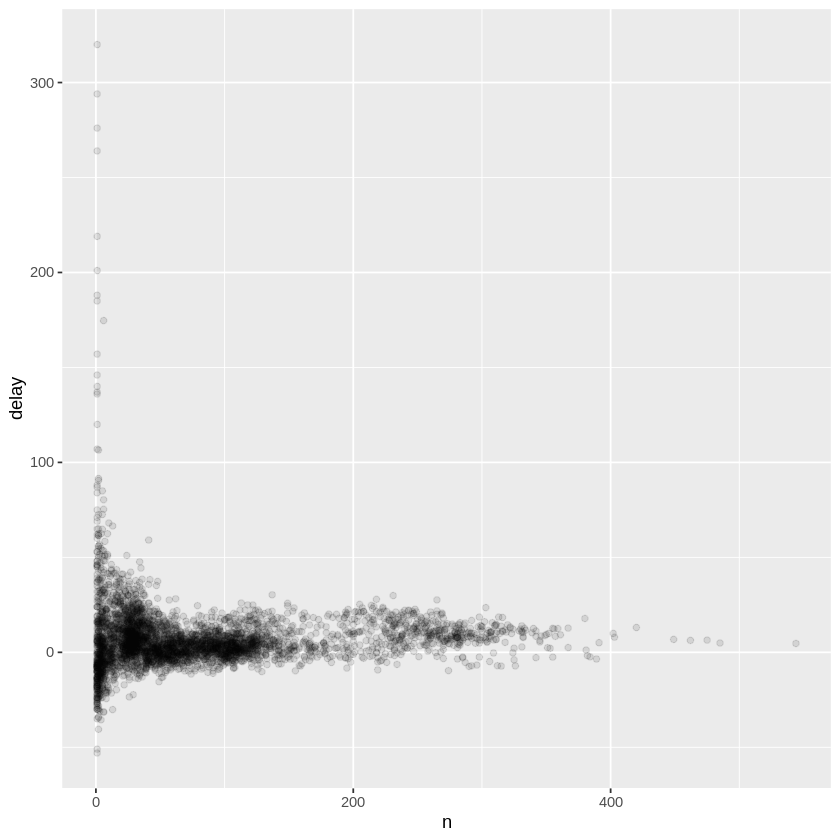

In [71]:
delays <- not_cancelled %>% 
  group_by(tailnum) %>% 
  summarise(
    delay = mean(arr_delay),
    n = n()
  )

ggplot(data = delays, mapping = aes(x = n, y = delay)) + 
  geom_point(alpha = 1/10)


Not surprisingly, there is much greater variation in the average delay when there are few flights.
The shape of this plot is very characteristic: whenever you plot a mean (or other summary) vs. group size, you'll see that the variation decreases as the sample size increases.

When looking at this sort of plot, it's often useful to filter out the groups with the smallest numbers of observations, so you can see more of the pattern and less of the extreme variation in the smallest groups.
This is what the following code does, as well as showing you a handy pattern for integrating ggplot2 into dplyr flows.
It's a bit painful that you have to switch from `%>%` to `+`, but once you get the hang of it, it's quite convenient.


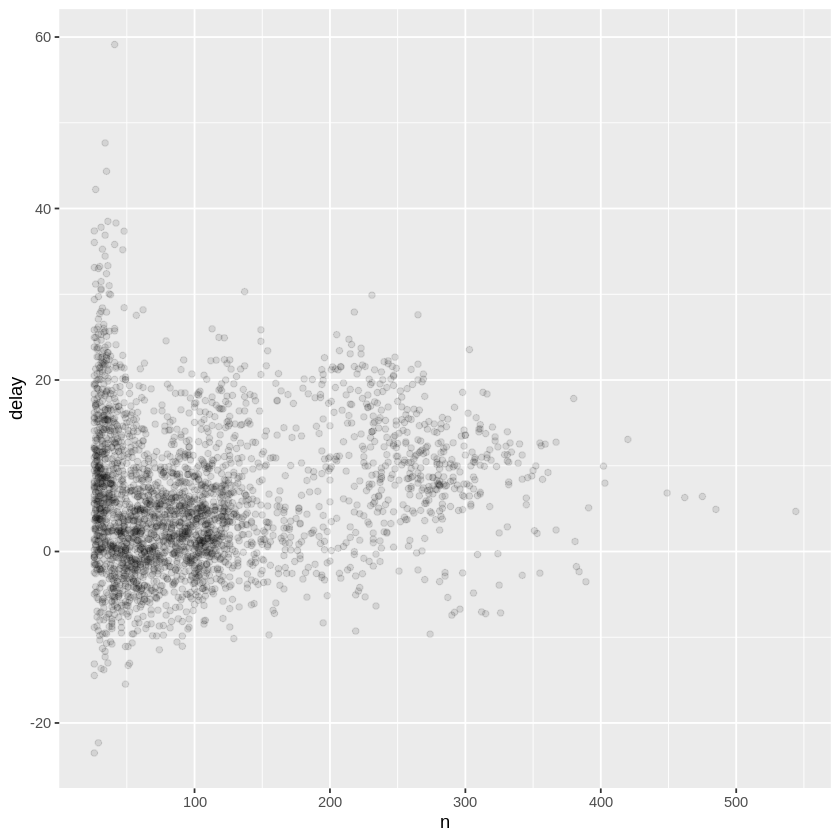

In [72]:
delays %>% 
  filter(n > 25) %>% 
  ggplot(mapping = aes(x = n, y = delay)) + 
  geom_point(alpha = 1/10)


------------------------------------------------------------------------

RStudio tip: a useful keyboard shortcut is Cmd/Ctrl + Shift + P.
This resends the previously sent chunk from the editor to the console.
This is very convenient when you're (e.g.) exploring the value of `n` in the example above.
You send the whole block once with Cmd/Ctrl + Enter, then you modify the value of `n` and press Cmd/Ctrl + Shift + P to resend the complete block.

------------------------------------------------------------------------

There's another common variation of this type of pattern.
Let's look at how the average performance of batters in baseball is related to the number of times they're at bat.
Here I use data from the **Lahman** package to compute the batting average (number of hits / number of attempts) of every major league baseball player.

When I plot the skill of the batter (measured by the batting average, `ba`) against the number of opportunities to hit the ball (measured by at bat, `ab`), you see two patterns:

1.  As above, the variation in our aggregate decreases as we get more data points.

2.  There's a positive correlation between skill (`ba`) and opportunities to hit the ball (`ab`).
    This is because teams control who gets to play, and obviously they'll pick their best players.


```r
# Convert to a tibble so it prints nicely
batting <- as_tibble(Lahman::Batting)

batters <- batting %>% 
  group_by(playerID) %>% 
  summarise(
    ba = sum(H, na.rm = TRUE) / sum(AB, na.rm = TRUE),
    ab = sum(AB, na.rm = TRUE)
  )

batters %>% 
  filter(ab > 100) %>% 
  ggplot(mapping = aes(x = ab, y = ba)) +
    geom_point() + 
    geom_smooth(se = FALSE)
```

<center>
    <img src="https://d33wubrfki0l68.cloudfront.net/85bae12481eef8ba696569a34d0bde264527296c/9da2c/transform_files/figure-html/unnamed-chunk-43-1.png" alt="img R" 
</center>


This also has important implications for ranking.
If you naively sort on `desc(ba)`, the people with the best batting averages are clearly lucky, not skilled:




```r
batters %>% 
  arrange(desc(ba))
#> # A tibble: 19,689 x 3
#>   playerID     ba    ab
#>   <chr>     <dbl> <int>
#> 1 abramge01     1     1
#> 2 alanirj01     1     1
#> 3 alberan01     1     1
#> 4 banisje01     1     1
#> 5 bartocl01     1     1
#> 6 bassdo01      1     1
#> # … with 19,683 more rows
```



You can find a good explanation of this problem at <http://varianceexplained.org/r/empirical_bayes_baseball/> and <http://www.evanmiller.org/how-not-to-sort-by-average-rating.html>.

### Useful summary functions

Just using means, counts, and sum can get you a long way, but R provides many other useful summary functions:

-   Measures of location: we've used `mean(x)`, but `median(x)` is also useful.
    The mean is the sum divided by the length; the median is a value where 50% of `x` is above it, and 50% is below it.


In [74]:
not_cancelled %>%
  group_by(month) %>%
  summarise(
    med_arr_delay = median(arr_delay),
    med_dep_delay = median(dep_delay)
    )

month,med_arr_delay,med_dep_delay
<int>,<dbl>,<dbl>
1,-3,-2
2,-3,-2
3,-6,-1
4,-2,-2
5,-8,-1
6,-2,0
7,-2,0
8,-5,-1
9,-12,-3



  It's sometimes useful to combine aggregation with logical subsetting.
    We haven't talked about this sort of subsetting yet, but you'll learn more about it in [vectors](../20_vectors) (Subsetting).


In [75]:
not_cancelled %>% 
  group_by(year, month, day) %>% 
  summarise(
    avg_delay1 = mean(arr_delay),
    avg_delay2 = mean(arr_delay[arr_delay > 0]) # the average positive delay
  )

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,avg_delay1,avg_delay2
<int>,<int>,<int>,<dbl>,<dbl>
2013,1,1,12.6510229,32.48156
2013,1,2,12.6928879,32.02991
2013,1,3,5.7333333,27.66087
2013,1,4,-1.9328194,28.30976
2013,1,5,-1.5258020,22.55882
2013,1,6,4.2364294,24.37270
2013,1,7,-4.9473118,27.76132
2013,1,8,-3.2275785,20.78909
2013,1,9,-0.2642777,25.63415



-   Measures of spread: `sd(x)`, `IQR(x)`, `mad(x)`.
    The root mean squared deviation, or standard deviation `sd(x)`, is the standard measure of spread.
    The interquartile range `IQR(x)` and median absolute deviation `mad(x)` are robust equivalents that may be more useful if you have outliers.


In [76]:
# Why is distance to some destinations more variable than to others?
not_cancelled %>% 
  group_by(dest) %>% 
  summarise(distance_sd = sd(distance)) %>% 
  arrange(desc(distance_sd))

dest,distance_sd
<chr>,<dbl>
EGE,10.542765
SAN,10.350094
SFO,10.216017
HNL,10.004197
SEA,9.977993
LAS,9.907786
PDX,9.873299
PHX,9.862546
LAX,9.657195



-   Measures of rank: `min(x)`, `quantile(x, 0.25)`, `max(x)`.
    Quantiles are a generalisation of the median.
    For example, `quantile(x, 0.25)` will find a value of `x` that is greater than 25% of the values, and less than the remaining 75%.


In [77]:
# When do the first and last flights leave each day?
not_cancelled %>% 
  group_by(year, month, day) %>% 
  summarise(
    first = min(dep_time),
    last = max(dep_time)
  )

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,first,last
<int>,<int>,<int>,<int>,<int>
2013,1,1,517,2356
2013,1,2,42,2354
2013,1,3,32,2349
2013,1,4,25,2358
2013,1,5,14,2357
2013,1,6,16,2355
2013,1,7,49,2359
2013,1,8,454,2351
2013,1,9,2,2252



-   Measures of position: `first(x)`, `nth(x, 2)`, `last(x)`.
    These work similarly to `x[1]`, `x[2]`, and `x[length(x)]` but let you set a default value if that position does not exist (i.e. you're trying to get the 3rd element from a group that only has two elements).
    For example, we can find the first and last departure for each day:


In [78]:
not_cancelled %>% 
  group_by(year, month, day) %>% 
  summarise(
    first_dep = first(dep_time), 
    last_dep = last(dep_time)
  )

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,first_dep,last_dep
<int>,<int>,<int>,<int>,<int>
2013,1,1,517,2356
2013,1,2,42,2354
2013,1,3,32,2349
2013,1,4,25,2358
2013,1,5,14,2357
2013,1,6,16,2355
2013,1,7,49,2359
2013,1,8,454,2351
2013,1,9,2,2252



  These functions are complementary to filtering on ranks.
    Filtering gives you all variables, with each observation in a separate row:


In [79]:
not_cancelled %>% 
  group_by(year, month, day) %>% 
  mutate(r = min_rank(desc(dep_time))) %>% 
  filter(r %in% range(r))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,r
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<int>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,831
2013,1,1,2356,2359,-3,425,437,-12,B6,727,N588JB,JFK,BQN,186,1576,23,59,2013-01-01 23:00:00,1
2013,1,2,42,2359,43,518,442,36,B6,707,N580JB,JFK,SJU,189,1598,23,59,2013-01-02 23:00:00,928
2013,1,2,2354,2359,-5,413,437,-24,B6,727,N789JB,JFK,BQN,180,1576,23,59,2013-01-02 23:00:00,1
2013,1,3,32,2359,33,504,442,22,B6,707,N763JB,JFK,SJU,193,1598,23,59,2013-01-03 23:00:00,900
2013,1,3,2349,2359,-10,434,445,-11,B6,739,N729JB,JFK,PSE,199,1617,23,59,2013-01-03 23:00:00,1
2013,1,4,25,2359,26,505,442,23,B6,707,N554JB,JFK,SJU,194,1598,23,59,2013-01-04 23:00:00,908
2013,1,4,2358,2359,-1,429,437,-8,B6,727,N599JB,JFK,BQN,189,1576,23,59,2013-01-04 23:00:00,1
2013,1,4,2358,2359,-1,436,445,-9,B6,739,N821JB,JFK,PSE,199,1617,23,59,2013-01-04 23:00:00,1



-   Counts: You've seen `n()`, which takes no arguments, and returns the size of the current group.
    To count the number of non-missing values, use `sum(!is.na(x))`.
    To count the number of distinct (unique) values, use `n_distinct(x)`.


In [80]:
# Which destinations have the most carriers?
not_cancelled %>% 
  group_by(dest) %>% 
  summarise(carriers = n_distinct(carrier)) %>% 
  arrange(desc(carriers))

dest,carriers
<chr>,<int>
ATL,7
BOS,7
CLT,7
ORD,7
TPA,7
AUS,6
DCA,6
DTW,6
IAD,6



  Counts are so useful that dplyr provides a simple helper if all you want is a count:


In [81]:
not_cancelled %>% 
  count(dest)

dest,n
<chr>,<int>
ABQ,254
ACK,264
ALB,418
ANC,8
ATL,16837
AUS,2411
AVL,261
BDL,412
BGR,358



   Just like with `group_by()`, you can also provide multiple variables to `count()`.


In [82]:
not_cancelled %>% 
  count(carrier, dest)

carrier,dest,n
<chr>,<chr>,<int>
9E,ATL,56
9E,AUS,2
9E,AVL,10
9E,BNA,452
9E,BOS,853
9E,BTV,2
9E,BUF,789
9E,BWI,815
9E,CAE,3



  You can optionally provide a weight variable.
    For example, you could use this to "count" (sum) the total number of miles a plane flew:


In [83]:
not_cancelled %>% 
  count(tailnum, wt = distance)

tailnum,n
<chr>,<dbl>
D942DN,3418
N0EGMQ,239143
N10156,109664
N102UW,25722
N103US,24619
N104UW,24616
N10575,139903
N105UW,23618
N107US,21677



-   Counts and proportions of logical values: `sum(x > 10)`, `mean(y == 0)`.
    When used with numeric functions, `TRUE` is converted to 1 and `FALSE` to 0.
    This makes `sum()` and `mean()` very useful: `sum(x)` gives the number of `TRUE`s in `x`, and `mean(x)` gives the proportion.


In [86]:
# How many flights left before 5am? (these usually indicate delayed
# flights from the previous day)
not_cancelled %>% 
  group_by(year, month, day) %>% 
  summarise(n_early = sum(dep_time < 500))



`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,n_early
<int>,<int>,<int>,<int>
2013,1,1,0
2013,1,2,3
2013,1,3,4
2013,1,4,3
2013,1,5,3
2013,1,6,2
2013,1,7,2
2013,1,8,1
2013,1,9,3


In [88]:

# What proportion of flights are delayed by more than an hour?
not_cancelled %>% 
  group_by(year, month, day) %>% 
  summarise(hour_prop = mean(arr_delay > 60))

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,hour_prop
<int>,<int>,<int>,<dbl>
2013,1,1,0.07220217
2013,1,2,0.08512931
2013,1,3,0.05666667
2013,1,4,0.03964758
2013,1,5,0.03486750
2013,1,6,0.04704463
2013,1,7,0.03333333
2013,1,8,0.02130045
2013,1,9,0.02015677



### Exercises

1.  Brainstorm at least 5 different ways to assess the typical delay characteristics of a group of flights.
    Consider the following scenarios:

    -   A flight is 15 minutes early 50% of the time, and 15 minutes late 50% of the time.

    -   A flight is always 10 minutes late.

    -   A flight is 30 minutes early 50% of the time, and 30 minutes late 50% of the time.

    -   99% of the time a flight is on time.
        1% of the time it's 2 hours late.

    Which is more important: arrival delay or departure delay?

2.  Come up with another approach that will give you the same output as `not_cancelled %>% count(dest)` and `not_cancelled %>% count(tailnum, wt = distance)` (without using `count()`).

3.  Our definition of cancelled flights (`is.na(dep_delay) | is.na(arr_delay)` ) is slightly suboptimal.
    Why?
    Which is the most important column?

4.  Look at the number of cancelled flights per day.
    Is there a pattern?
    Is the proportion of cancelled flights related to the average delay?

5.  Which carrier has the worst delays?
    Challenge: can you disentangle the effects of bad airports vs. bad carriers?
    Why/why not?
    (Hint: think about `flights %>% group_by(carrier, dest) %>% summarise(n())`)

6.  What does the `sort` argument to `count()` do.
    When might you use it?

## Grouped mutates and filters

Grouping is most useful in conjunction with `summarise()`, but you can also do convenient operations with `mutate()` and `filter()`:

-   Find the worst members of each group:


In [89]:
flights_sml %>% 
  group_by(year, month, day) %>%
  filter(rank(desc(arr_delay)) < 10)

year,month,day,dep_delay,arr_delay,distance,air_time
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,853,851,184,41
2013,1,1,290,338,1134,213
2013,1,1,260,263,266,46
2013,1,1,157,174,213,60
2013,1,1,216,222,708,121
2013,1,1,255,250,589,115
2013,1,1,285,246,1085,146
2013,1,1,192,191,199,44
2013,1,1,379,456,1092,222



-   Find all groups bigger than a threshold:


In [90]:
popular_dests <- flights %>% 
  group_by(dest) %>% 
  filter(n() > 365)
popular_dests

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00



-   Standardise to compute per group metrics:


In [91]:
popular_dests %>% 
  filter(arr_delay > 0) %>% 
  mutate(prop_delay = arr_delay / sum(arr_delay)) %>% 
  select(year:day, dest, arr_delay, prop_delay)

year,month,day,dest,arr_delay,prop_delay
<int>,<int>,<int>,<chr>,<dbl>,<dbl>
2013,1,1,IAH,11,1.106740e-04
2013,1,1,IAH,20,2.012255e-04
2013,1,1,MIA,33,2.350026e-04
2013,1,1,ORD,12,4.239594e-05
2013,1,1,FLL,19,9.377853e-05
2013,1,1,ORD,8,2.826396e-05
2013,1,1,LAX,7,3.444441e-05
2013,1,1,DFW,31,2.817951e-04
2013,1,1,ATL,12,3.996017e-05



A grouped filter is a grouped mutate followed by an ungrouped filter.
I generally avoid them except for quick and dirty manipulations: otherwise it's hard to check that you've done the manipulation correctly.

Functions that work most naturally in grouped mutates and filters are known as window functions (vs. the summary functions used for summaries).
You can learn more about useful window functions in the corresponding vignette: `vignette("window-functions")`.

### Exercises

1.  Refer back to the lists of useful mutate and filtering functions.
    Describe how each operation changes when you combine it with grouping.

2.  Which plane (`tailnum`) has the worst on-time record?

3.  What time of day should you fly if you want to avoid delays as much as possible?

4.  For each destination, compute the total minutes of delay.
    For each flight, compute the proportion of the total delay for its destination.

5.  Delays are typically temporally correlated: even once the problem that caused the initial delay has been resolved, later flights are delayed to allow earlier flights to leave.
    Using `lag()`, explore how the delay of a flight is related to the delay of the immediately preceding flight.

6.  Look at each destination.
    Can you find flights that are suspiciously fast?
    (i.e. flights that represent a potential data entry error).
    Compute the air time of a flight relative to the shortest flight to that destination.
    Which flights were most delayed in the air?

7.  Find all destinations that are flown by at least two carriers.
    Use that information to rank the carriers.

8.  For each plane, count the number of flights before the first delay of greater than 1 hour.
